# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
import scipy.stats as scs

# Carregando a base

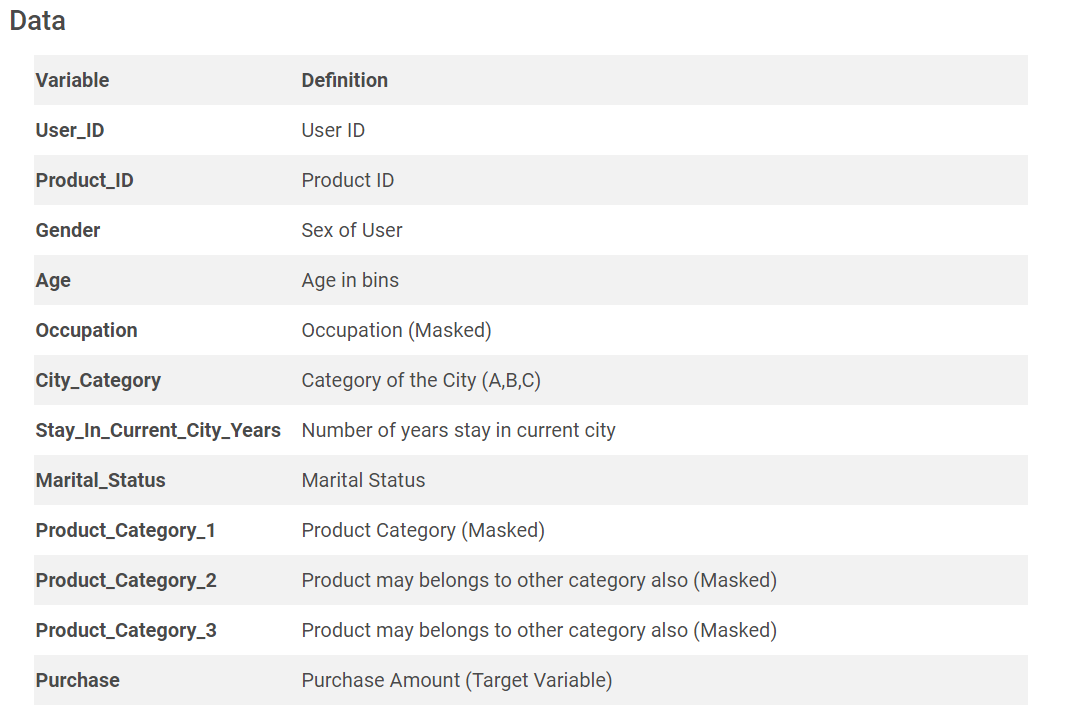

In [ ]:
test = '/content/drive/MyDrive/Estatística e Ciência de Dados/projeto sales predict/test.csv'
train = '/content/drive/MyDrive/Estatística e Ciência de Dados/projeto sales predict/train.csv'
data_test = pd.read_csv(test, sep=',')
data_train = pd.read_csv(train, sep=',')

data_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
data_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
data_train.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


In [ ]:
data_train.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
data_test.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [ ]:
print(data_train.shape, data_test.shape)

(550068, 12) (233599, 11)


In [ ]:
173638/550068

0.3156664266963357

In [ ]:
print(data_train.dtypes, data_test.dtypes)

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object


## Cleaning and transform

In [ ]:
data_train['Product_Category_2'] = data_train['Product_Category_2'].fillna(data_train['Product_Category_1'])
data_train['Product_Category_3'] = data_train['Product_Category_3'].fillna(data_train['Product_Category_2'])


In [ ]:
data_test['Product_Category_2'] = data_test['Product_Category_2'].fillna(data_test['Product_Category_1'])
data_test['Product_Category_3'] = data_test['Product_Category_3'].fillna(data_test['Product_Category_2'])


In [ ]:
#train
data_train['Product_Category_2'] = data_train['Product_Category_2'].astype('int')
data_train['Product_Category_3'] = data_train['Product_Category_3'].astype('int')
data_train['User_ID'] = data_train['User_ID'].astype('str')
#test
data_test['Product_Category_2'] = data_test['Product_Category_2'].astype('int')
data_test['Product_Category_3'] = data_test['Product_Category_3'].astype('int')
data_test['User_ID'] = data_test['User_ID'].astype('str')


In [ ]:
print(data_train.dtypes, data_test.dtypes)

User_ID                       object
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Product_Category_3             int64
Purchase                       int64
dtype: object User_ID                       object
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Product_Category_3             int64
dtype: object


In [ ]:
data_train.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

# Exploração e vizualização

In [ ]:
data_train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,3,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,12,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,14,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2,2,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8,17,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15,15,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16,16,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,8,8,7871


Perguntas

 **Sobre os clientes**:
- Qual a quantidade de clientes unicos?
- Qual a ocupação deles?
- Temos mais mulheres ou homens comprando na nossa loja?
- Qual faixa etária é mais presente?

 **Clientes e seus produtos:**
- Qual produto é mais consumido?
- Qual produto é mais consumido pro faixa etária, sexo e cidade?
- Valor medio de compra por faixa etária, sexo e cidade
- Valor medio de compra por clinte
- Correlação entre valor medio de compra e demais variaveis

In [ ]:
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go

In [ ]:
print('Quantidade de clientes para treino:', len(data_train['User_ID'].unique()))

print('Quantidade de clientes para teste:', len(data_test['User_ID'].unique()))
print('Quantidade de entradas no treino:', data_train.shape[0])
print('Quantidade de entradas no teste:', data_test.shape[0])

Quantidade de clientes para treino: 5891
Quantidade de clientes para teste: 5891
Quantidade de entradas no treino: 550068
Quantidade de entradas no teste: 233599


In [ ]:
233599/(550068+233599)

0.298084518041464

In [ ]:

gender = data_train.groupby(by =['User_ID','Gender'],group_keys=False)['User_ID','Gender','Age','Occupation','Purchase'].max()

print('Quantidade de mulheres na base de treino:')
print(len(np.array(gender[gender['Gender'] =='F'])))
print('Quantidad de homens na base de treino')
print(len(np.array(gender[gender['Gender'] =='M'])))

<ipython-input-22-e0dc956b7756>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Quantidade de mulheres na base de treino:
1666
Quantidad de homens na base de treino
4225


Text(0, 0.5, 'Frequência absoluta')

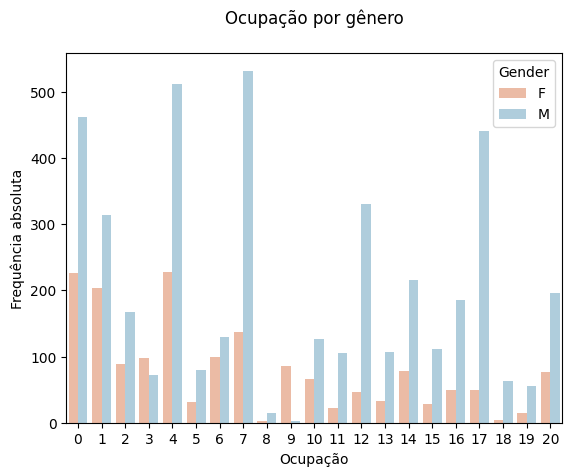

In [ ]:
# Primeiramente importamos as libs
import numpy as np
import matplotlib.pyplot as plt

ax = sns.countplot(x = 'Occupation', hue = 'Gender',data = gender, palette='RdBu')
plt.title('Ocupação por gênero\n')
plt.xlabel('Ocupação')
plt.ylabel('Frequência absoluta')

In [ ]:
ocupacao = data_train.groupby(by =['User_ID','Occupation'],group_keys=False)['User_ID','Occupation'].max()
ocupacao.head()

<ipython-input-24-3246768136aa>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,,User_ID,Occupation
User_ID,Occupation,,
1000001,10,1000001,10
1000002,16,1000002,16
1000003,15,1000003,15
1000004,7,1000004,7
1000005,20,1000005,20


Text(0, 0.5, 'Frequência absoluta')

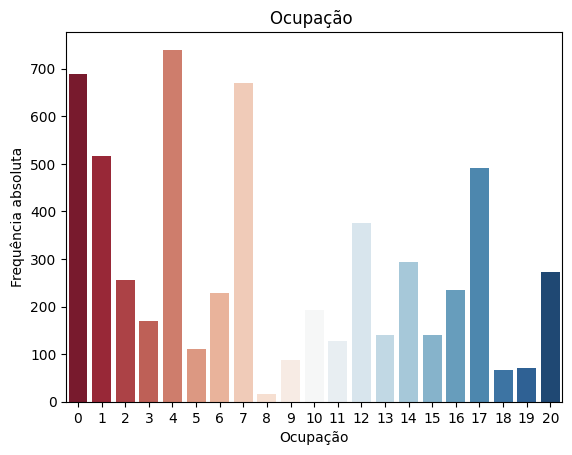

In [ ]:
# Primeiramente importamos as libs
import numpy as np
import matplotlib.pyplot as plt

ax = sns.countplot(x = 'Occupation',data = ocupacao, palette='RdBu')
plt.title('Ocupação ')
plt.xlabel('Ocupação')
plt.ylabel('Frequência absoluta')

<ipython-input-26-687a2b01db73>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-26-687a2b01db73>:9: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



Text(0, 0.5, 'Frequência Absoluta')

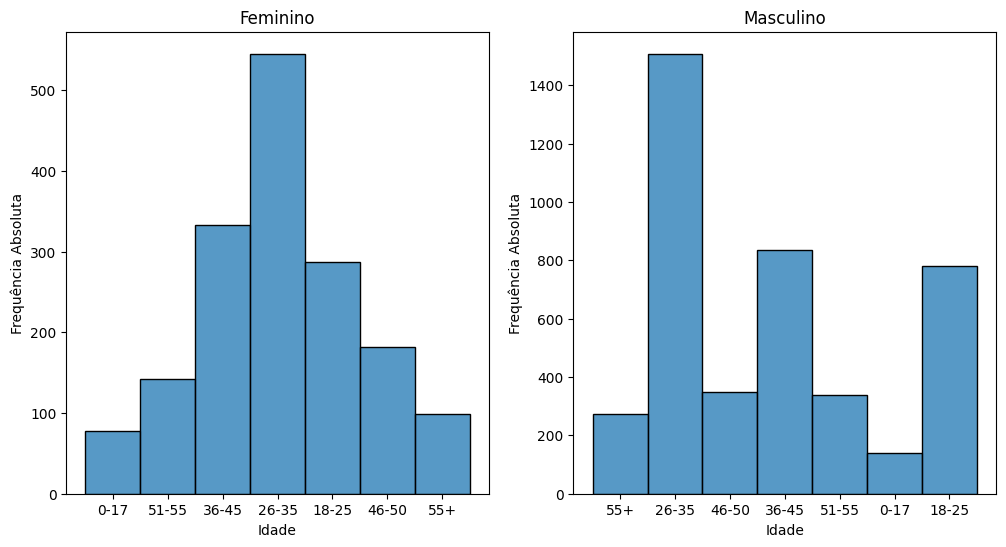

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(gender.query('Gender == "F"')['Age'], palette='RdBu', bins = 8)
plt.title('Feminino')
plt.xlabel('Idade')
plt.ylabel('Frequência Absoluta')

plt.subplot(1, 2, 2)
sns.histplot(gender.query('Gender == "M"')['Age'], palette='RdBu',bins = 8)
plt.title('Masculino')
plt.xlabel('Idade')
plt.ylabel('Frequência Absoluta')

In [ ]:
data_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,3,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,12,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,14,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8,8,7969


In [ ]:
# Qual produto é mais consumido pro faixa etária, sexo e cidade?
data_train['aux']=1
produto = data_train.groupby(['Product_ID']).agg({'Product_ID':'max',
                                                  'aux': 'sum',
                                                  'City_Category':'max',
                                                  'Gender':'max',
                                                  'Age':'max',
                                                  'Purchase': 'mean'}).sort_values('aux',ascending=False)
produto_limit = produto.head(20)
produto_limit.head()

,Product_ID,aux,City_Category,Gender,Age,Purchase
Product_ID,,,,,,
P00265242,P00265242,1880,C,M,55+,7534.848404
P00025442,P00025442,1615,C,M,55+,17334.468111
P00110742,P00110742,1612,C,M,55+,16577.114764
P00112142,P00112142,1562,C,M,55+,15503.204866
P00057642,P00057642,1470,C,M,55+,15716.176871


In [ ]:
data_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,aux
0,1000001,P00069042,F,0-17,10,A,2,0,3,3,3,8370,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200,1
2,1000001,P00087842,F,0-17,10,A,2,0,12,12,12,1422,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,14,1057,1
4,1000002,P00285442,M,55+,16,C,4+,0,8,8,8,7969,1


In [ ]:
users = data_train.groupby(by=['User_ID']).agg({'User_ID':'max',
                                                'aux':'sum',
                                                'Age':'max',
                                                'City_Category':'max',
                                                'Gender':'max',
                                                'Purchase':'mean'
                                            })
users.head()

,User_ID,aux,Age,City_Category,Gender,Purchase
User_ID,,,,,,
1000001,1000001,35,0-17,A,F,9545.514286
1000002,1000002,77,55+,C,M,10525.610390
1000003,1000003,29,26-35,A,M,11780.517241
1000004,1000004,14,46-50,B,M,14747.714286
1000005,1000005,106,26-35,A,M,7745.292453


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'P00265242'),
  Text(1, 0, 'P00025442'),
  Text(2, 0, 'P00110742'),
  Text(3, 0, 'P00112142'),
  Text(4, 0, 'P00057642'),
  Text(5, 0, 'P00184942'),
  Text(6, 0, 'P00046742'),
  Text(7, 0, 'P00058042'),
  Text(8, 0, 'P00145042'),
  Text(9, 0, 'P00059442'),
  Text(10, 0, 'P00237542'),
  Text(11, 0, 'P00255842'),
  Text(12, 0, 'P00117942'),
  Text(13, 0, 'P00110942'),
  Text(14, 0, 'P00010742'),
  Text(15, 0, 'P00220442'),
  Text(16, 0, 'P00110842'),
  Text(17, 0, 'P00117442'),
  Text(18, 0, 'P00051442'),
  Text(19, 0, 'P00102642')])

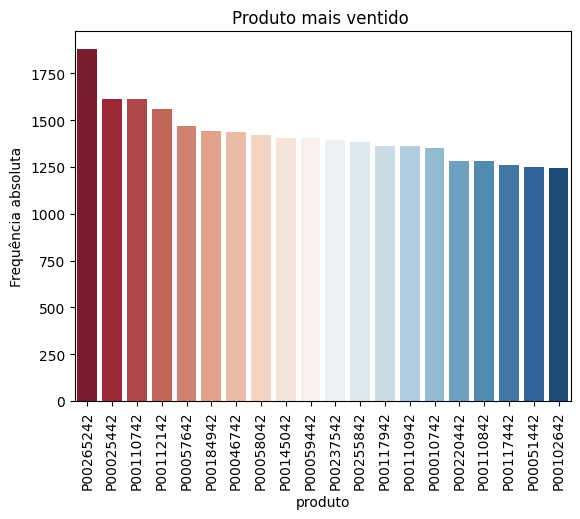

In [ ]:
ax = sns.barplot(x = 'Product_ID',y = 'aux', data = produto_limit, palette='RdBu')
plt.title('Produto mais ventido ')
plt.xlabel('produto')
plt.ylabel('Frequência absoluta')
plt.xticks(rotation=90)

Text(0, 0.5, 'Media de Gastos')

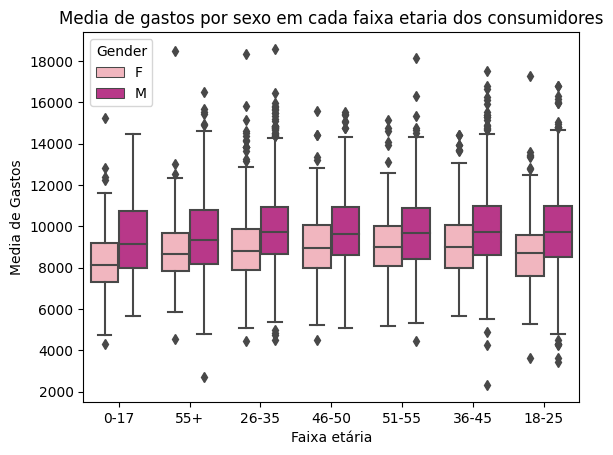

In [ ]:
#boxplot de doença cardíaca por faixas etária e sexo - pode melhorar tambemm
sns.boxplot(x='Age', y = 'Purchase', hue='Gender', data=users,palette='RdPu')
plt.title('Media de gastos por sexo em cada faixa etaria dos consumidores')
plt.xlabel('Faixa etária')
plt.ylabel('Media de Gastos')

Text(0, 0.5, 'Media de Gastos')

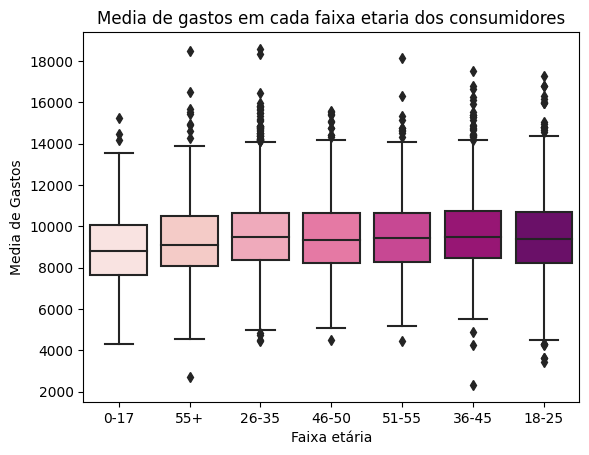

In [ ]:
# Valor medio de compra por clinte
#boxplot de doença cardíaca por faixas etária e sexo - pode melhorar tambemm
sns.boxplot(x='Age', y = 'Purchase', data=users,palette='RdPu')
plt.title('Media de gastos em cada faixa etaria dos consumidores')
plt.xlabel('Faixa etária')
plt.ylabel('Media de Gastos')

# Treino do modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing

In [ ]:
data_test.dtypes

User_ID                       object
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Product_Category_3             int64
dtype: object

In [ ]:
# # cast types
# data_train['Occupation'] = data_train['Occupation'].astype('str')
# data_train['Marital_Status'] = data_train['Marital_Status'].astype('str')
# data_train['Product_Category_1'] = data_train['Product_Category_1'].astype('str')
# data_train['Product_Category_2'] = data_train['Product_Category_2'].astype('str')
# data_train['Product_Category_3'] = data_train['Product_Category_3'].astype('str')

# data_test['Occupation'] = data_test['Occupation'].astype('str')
# data_test['Marital_Status'] = data_test['Marital_Status'].astype('str')
# data_test['Product_Category_1'] = data_test['Product_Category_1'].astype('str')
# data_test['Product_Category_2'] = data_test['Product_Category_2'].astype('str')
# data_test['Product_Category_3'] = data_test['Product_Category_3'].astype('str')

In [ ]:
columns = ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase']
data_train = data_train.filter(items = columns)


In [ ]:
# Normalização
# Criando variáveis dummy para a variável "cor"
dummies = pd.get_dummies(data_train['Gender'], prefix='Gender')
dummies_1 = pd.get_dummies(data_train['Age'], prefix='Age')

dummies_2 = pd.get_dummies(data_train['City_Category'], prefix='City_Category')
dummies_3 = pd.get_dummies(data_train['Stay_In_Current_City_Years'], prefix='current_city')

In [ ]:
# Concatenando o dataframe original com as variáveis dummy
df = pd.concat([dummies, dummies_1], axis=1)
df = pd.concat([df, dummies_2], axis=1)
df = pd.concat([df, dummies_3], axis=1)

df.head(10)

,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,current_city_0,current_city_1,current_city_2,current_city_3,current_city_4+
0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
5,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
6,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
7,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
8,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
9,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
df.columns

Index(['Gender_F', 'Gender_M', 'Age_0-17', 'Age_18-25', 'Age_26-35',
       'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+', 'City_Category_A',
       'City_Category_B', 'City_Category_C', 'current_city_0',
       'current_city_1', 'current_city_2', 'current_city_3',
       'current_city_4+'],
      dtype='object')

In [ ]:
df = df.drop(['Gender_M','Age_55+','City_Category_C','current_city_4+'], axis=1)

In [ ]:
# Concatenando o dataframe original com as variáveis dummy
df = pd.concat([data_train.filter(items=['Product_ID','User_ID','Purchase']), df], axis=1)
df.head(10)

,Product_ID,User_ID,Purchase,Gender_F,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,City_Category_A,City_Category_B,current_city_0,current_city_1,current_city_2,current_city_3
0,P00069042,1000001,8370,1,1,0,0,0,0,0,1,0,0,0,1,0
1,P00248942,1000001,15200,1,1,0,0,0,0,0,1,0,0,0,1,0
2,P00087842,1000001,1422,1,1,0,0,0,0,0,1,0,0,0,1,0
3,P00085442,1000001,1057,1,1,0,0,0,0,0,1,0,0,0,1,0
4,P00285442,1000002,7969,0,0,0,0,0,0,0,0,0,0,0,0,0
5,P00193542,1000003,15227,0,0,0,1,0,0,0,1,0,0,0,0,1
6,P00184942,1000004,19215,0,0,0,0,0,1,0,0,1,0,0,1,0
7,P00346142,1000004,15854,0,0,0,0,0,1,0,0,1,0,0,1,0
8,P0097242,1000004,15686,0,0,0,0,0,1,0,0,1,0,0,1,0
9,P00274942,1000005,7871,0,0,0,1,0,0,0,1,0,0,1,0,0


In [ ]:

from sklearn.preprocessing import LabelEncoder
# Criando um objeto LabelEncoder
le = LabelEncoder()

# Aplicando o encoder à variável "Product_ID"
df['Product_ID'] = le.fit_transform(df['Product_ID'])

# df['Purchase'] = (df['Purchase'] - df['Purchase'].min())/(df['Purchase'].max()-df['Purchase'].min())

X_train = df.drop('Purchase', axis=1)
y_train = df.Purchase



In [ ]:
y_train.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)